<a href="https://colab.research.google.com/github/Neelov12/MAT-421-Computational-Methods-Integrated-into-Python/blob/main/Module_H_22_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module H: Section 22.4. 22.5, 22.6

## Numerical Error and Instability

Numerical Error refers to inaccuracies that arise during numerical computations, typically due to limitations in how numbers are represented and processed by computers. These can include round-off errors (from representing real numbers with finite precision) and truncation errors (from approximating mathematical procedures).

Numerical Instability occurs when small errors in input or intermediate steps grow significantly during computation, leading to large inaccuracies in the final result. An algorithm is considered unstable if it amplifies errors rather than controls or reduces them.

In short:

Numerical error is about the size of inaccuracies.

Instability is about how those inaccuracies behave during computation.

Here is a program that demonstrates floating-point precision issues for the function

$
f(x) = \frac{1-cos(x)}{x^2}
$

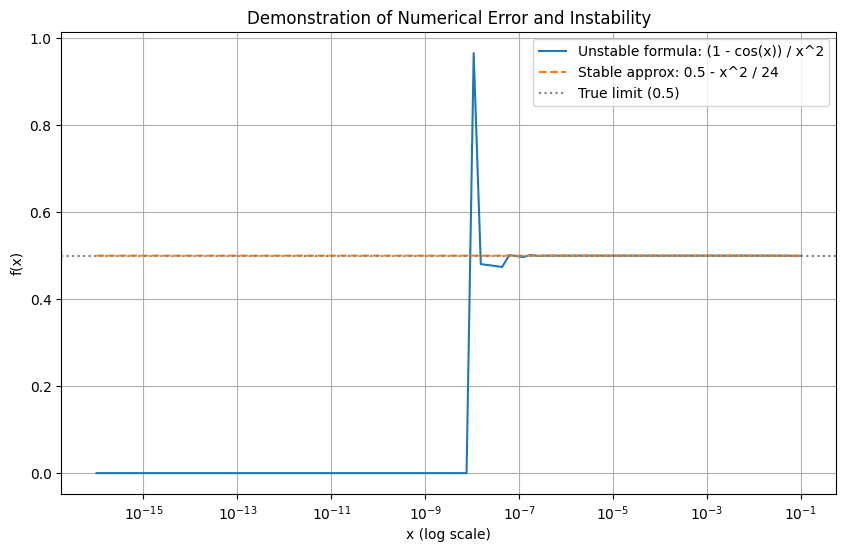

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values approaching 0
x = np.logspace(-16, -1, 100)
# Original formula
f1 = (1 - np.cos(x)) / x**2
# More stable reformulation using a series expansion:
# 1 - cos(x) ≈ x^2 / 2 - x^4 / 24 + ...
f2 = 0.5 - (x**2)/24  # 2nd order approximation

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label='Unstable formula: (1 - cos(x)) / x^2')
plt.plot(x, f2, label='Stable approx: 0.5 - x^2 / 24', linestyle='--')
plt.axhline(0.5, color='gray', linestyle=':', label='True limit (0.5)')
plt.xscale('log')
plt.xlabel('x (log scale)')
plt.ylabel('f(x)')
plt.title('Demonstration of Numerical Error and Instability')
plt.legend()
plt.grid(True)
plt.show()

## Predictor-Corrector Methods

Predictor-Corrector Methods are a class of numerical techniques used to solve ordinary differential equations (ODEs). They work by combining two steps:

Predictor step: Estimate the solution at the next point using an explicit method (like Euler’s method).

Corrector step: Refine this estimate using an implicit method or an improved explicit method (like trapezoidal rule or Heun’s method).

The idea is to get a quick guess (predict) and then correct it for better accuracy.

Here is a program that solves the ODE:

$
\frac{dy}{dx} = y - t^2 + 1, y(0) = 0.5
$

It has the following steps:

1. Predict using Euler’s method.

2. Correct using the average slope (Heun’s method).

3. Compare with the exact solution.

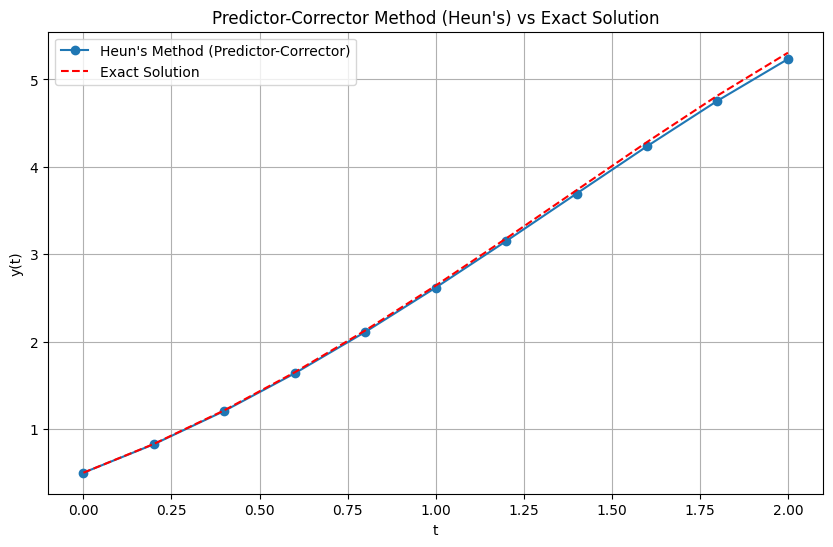

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(t, y) = dy/dt
def f(t, y):
    return y - t**2 + 1

# Exact solution for comparison
def exact_solution(t):
    return (t + 1)**2 - 0.5 * np.exp(t)

# Heun's method (Predictor-Corrector)
def heun_method(f, y0, t0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]

        # Predictor (Euler)
        y_predict = y + h * f(t, y)

        # Corrector (Average slope)
        y_corrected = y + h * 0.5 * (f(t, y) + f(t + h, y_predict))

        y_values[i] = y_corrected

    return t_values, y_values

# Parameters
y0 = 0.5
t0 = 0
t_end = 2
h = 0.2  # Try reducing this to see better accuracy

# Solve with Heun's method
t_vals, y_heun = heun_method(f, y0, t0, t_end, h)

# Compute exact solution
y_exact = exact_solution(t_vals)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_heun, 'o-', label="Heun's Method (Predictor-Corrector)")
plt.plot(t_vals, y_exact, 'r--', label="Exact Solution")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Predictor-Corrector Method (Heun's) vs Exact Solution")
plt.grid(True)
plt.legend()
plt.show()